## Домашнее задание 

### Задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [2]:
import pickle
import numpy as np

with open('7.10._clustering.pkl','rb') as f:
    data_clustering = pickle.load(f)
    
data_clustering

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [3]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4).fit(X)

In [5]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, model.labels_)
score

0.4417501080615704

При к=4 метрика слуэта уменьшилась, т.е. стала хуже.

### Задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [6]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')
score

0.5827727212133399

Метрика AMI так же уменьшилась.

### Задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [30]:
import pickle
import numpy as np
import pandas as pd

data_clustering = pd.read_csv('7.10_clustering_hw.csv')
    
data_clustering

X = data_clustering[['x1','x2']]
Y = data_clustering['y']

(300, 2)

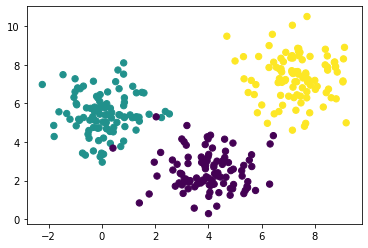

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X['x1'], X['x2'], marker='o', c=Y, s=40)

In [24]:
from sklearn.metrics.pairwise import euclidean_distances
metrics =[]

MAX_CLUSTERS = 10

for cluster_num in range(1, MAX_CLUSTERS):
    kmean_model = KMeans(n_clusters=cluster_num, random_state=42).fit(X)
    centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric+= euclidean_distances(
                                    X[labels==centroid_label],
                                    centroids[centroid_label,:].reshape(1,-1)
                                    ).sum(axis=0)[0]
    print(f'cluster_num {cluster_num} metric {metric}')
    metrics.append(metric)

cluster_num 1 metric 1105.8973781101085
cluster_num 2 metric 663.5712032768099
cluster_num 3 metric 374.65897141840577
cluster_num 4 metric 348.1437158400457
cluster_num 5 metric 323.0641174937497
cluster_num 6 metric 300.79866269993056
cluster_num 7 metric 284.68562471878835
cluster_num 8 metric 265.3608519797425
cluster_num 9 metric 252.47585878921473


best cluster num: 3


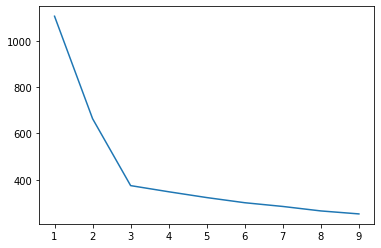

In [25]:
from matplotlib import pyplot as plt

D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

In [27]:
model = KMeans(n_clusters=3, random_state=42).fit(X)

In [34]:
point1 = model.predict([[5,8]])
print(point1)
point2 = model.predict([[0,5]])
print(point2)

[1]
[0]


Точки [5,8] и [0,5] преналежат разным классам.

In [35]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')
score

0.970007495368386

### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)